# TAREA 2 | PUNTO 2 (VERLET)

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# PARTE A

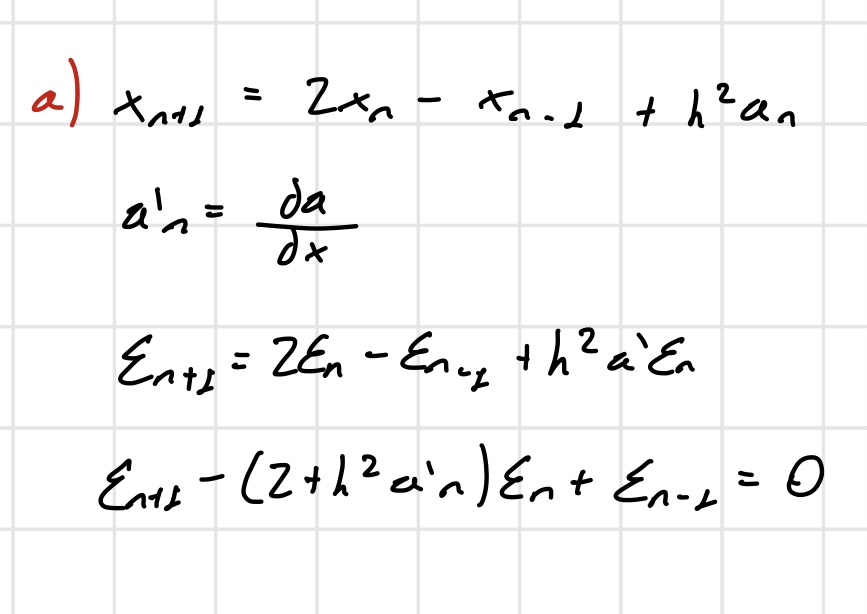

# PARTE B

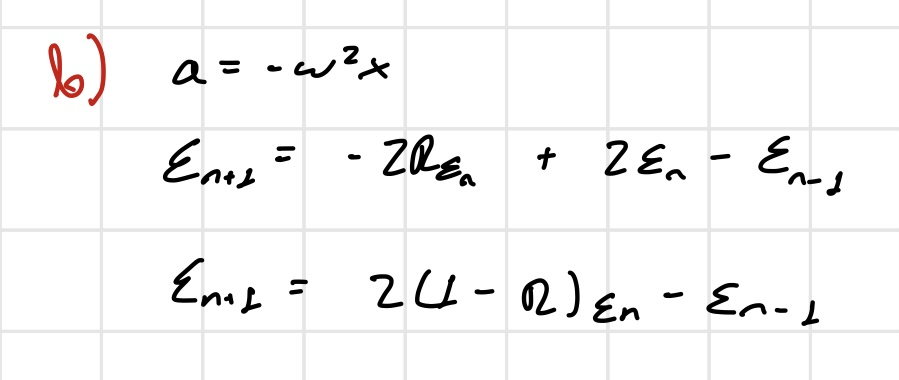

# PARTE C

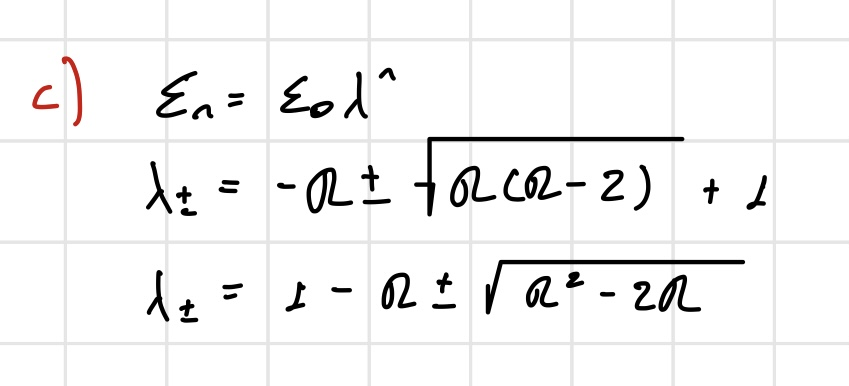

# PARTE D

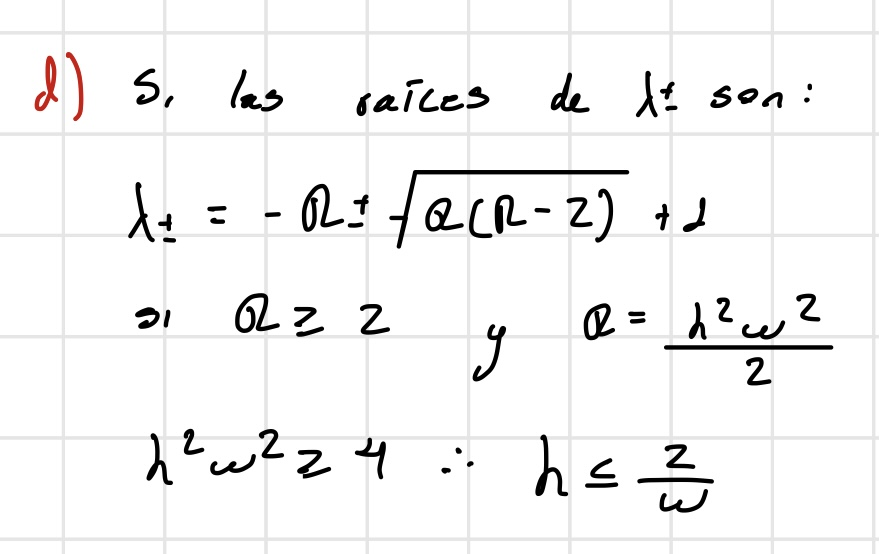

# PARTE E

In [2]:
w = np.pi
x0 = 1 
v0 = 1  
stable = 2 / w / 10  # Paso de tiempo estable (mucho menor que 2/omega)
unstable = 2 / w  # Paso de tiempo inestable (mayor que 2/omega)

In [3]:
def verlet(w, x0, v0, dt, steps):
    x = np.zeros(steps)
    x[0] = x0
    x[1] = x0 + v0 * dt
    for i in range(1, steps-1):
        xn = x[i]
        xn2 = 2*xn
        x_next = xn2 - x[i-1] - w**2 * xn * dt**2
        # Verificar desbordamiento
        if np.isfinite(x_next):
            x[i+1] = x_next
        else:
            # Limitar el número de pasos una vez que se detecta el desbordamiento
            return x[:i+1]
    return x

In [4]:
steps = 10

v_stable = verlet(w, x0, v0, stable, steps)
v_unstable = verlet(w, x0, v0, unstable, steps)

<IPython.core.display.Javascript object>


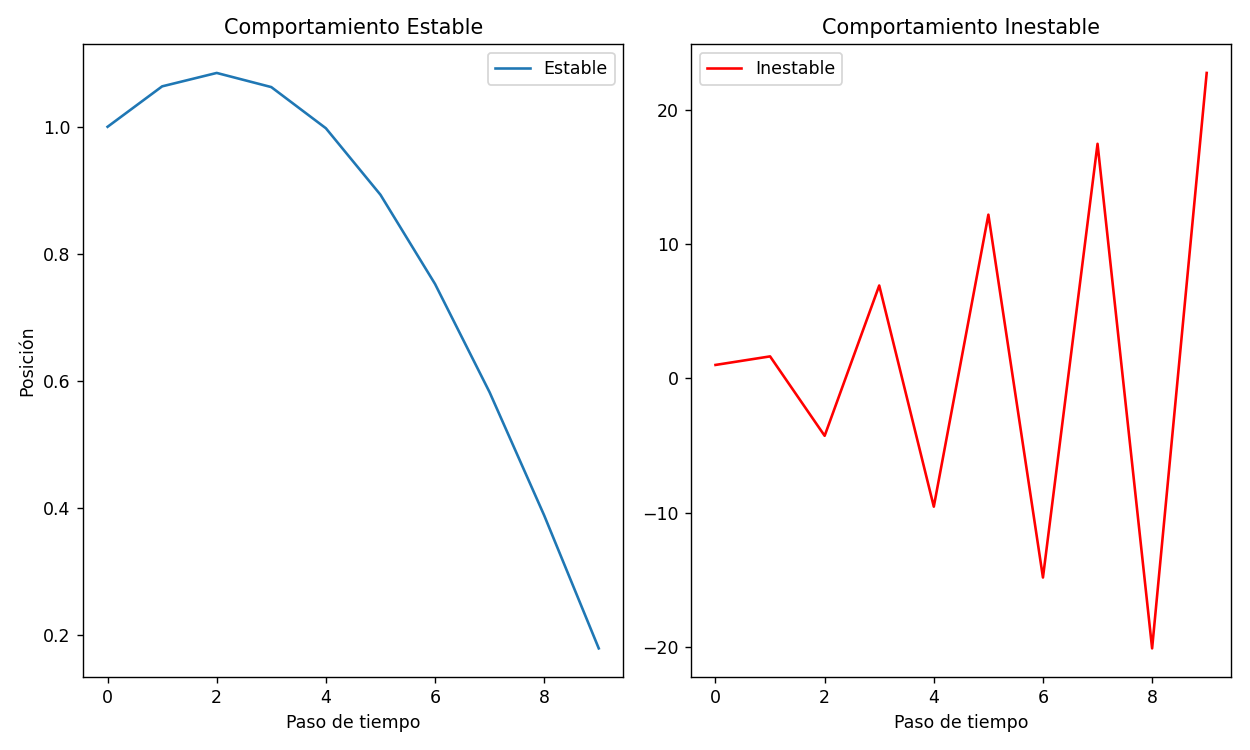

In [5]:
plt.figure(figsize=(10, 6))

# Comportamiento estable
plt.subplot(1, 2, 1)
plt.plot(v_stable, label="Estable")
plt.title("Comportamiento Estable")
plt.xlabel("Paso de tiempo")
plt.ylabel("Posición")
plt.legend()

# Comportamiento inestable
plt.subplot(1, 2, 2)
plt.plot(v_unstable, label="Inestable", color='red')
plt.title("Comportamiento Inestable")
plt.xlabel("Paso de tiempo")
plt.legend()

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


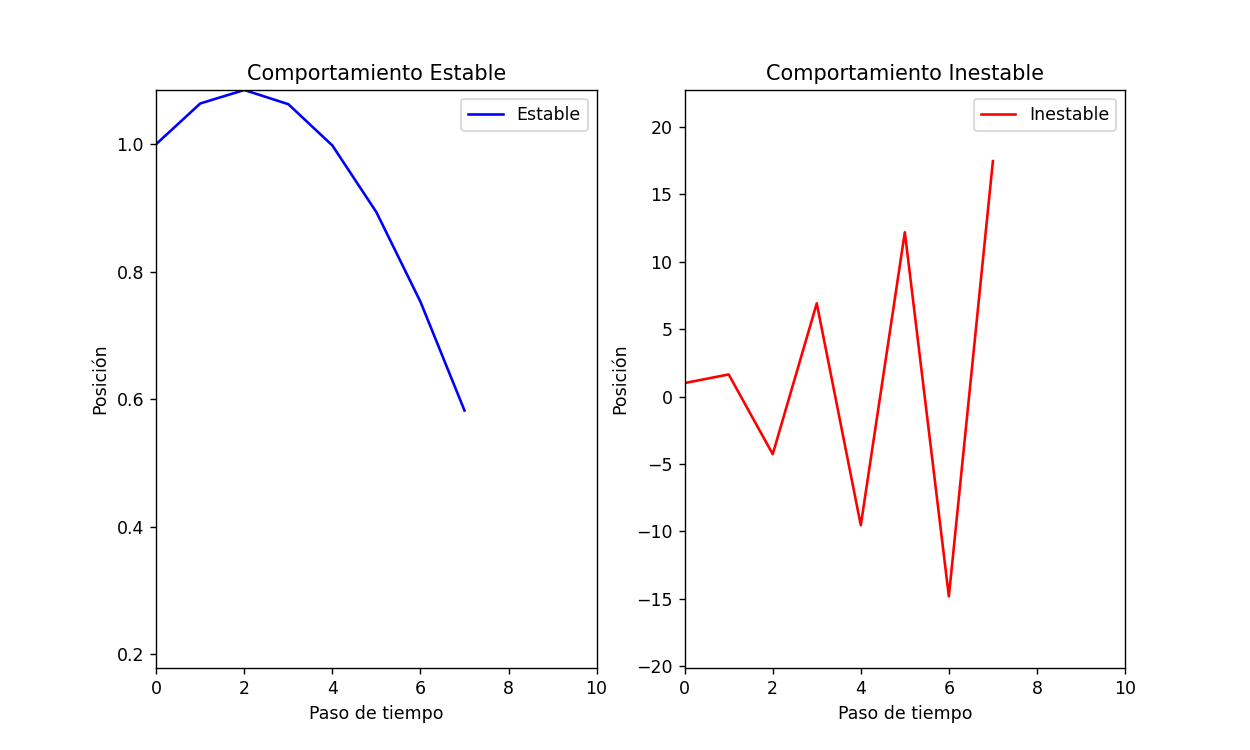

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Líneas que se van a actualizar en cada cuadro de la animación
line_stable, = ax[0].plot([], [], label="Estable", color='blue')
line_unstable, = ax[1].plot([], [], label="Inestable", color='red')

# Configuración inicial de los ejes
# Para el gráfico estable
ax[0].set_xlim(0, steps)
ax[0].set_ylim(np.min(v_stable), np.max(v_stable))  # Límites específicos para el gráfico estable
ax[0].set_xlabel("Paso de tiempo")
ax[0].set_ylabel("Posición")
ax[0].legend()
ax[0].set_title("Comportamiento Estable")

# Para el gráfico inestable
ax[1].set_xlim(0, steps)
ax[1].set_ylim(np.min(v_unstable), np.max(v_unstable))  # Límites específicos para el gráfico inestable
ax[1].set_xlabel("Paso de tiempo")
ax[1].set_ylabel("Posición")
ax[1].legend()
ax[1].set_title("Comportamiento Inestable")

def init():
    line_stable.set_data([], [])
    line_unstable.set_data([], [])
    return line_stable, line_unstable

def animate(i):
    line_stable.set_data(range(i), v_stable[:i])
    line_unstable.set_data(range(i), v_unstable[:i])
    return line_stable, line_unstable

anim = FuncAnimation(fig, animate, init_func=init, frames=steps, interval=200, blit=True)

plt.show()